### Treść zadania

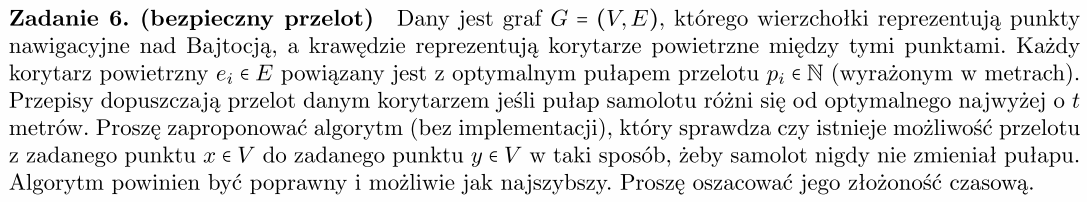

# 1) Sposób I

### Omówienie algorytmu

Najłatwiejszym sposobem na rozwiązanie tego zadania jest po prostu sprawdzenie, czy możemy znaleźć ścieżkę w grafie, rozpoczynając na pułapie o pewnej wartości $ p $. W tym przypadku sprawdzamy tylko wszystkie możliwe, wyrażone w metrach pułapy, jakie pozwalają nam na wydostanie się z wierzchołka startowego i testujemy, czy dana wartość pułapu jest odpowiednia, aby dotrzeć do celu. Można zauważyć, że dla ograniczonych stałymi wartości minimalnej oraz maksymalnej dopuszczalnych pułapów startowych, otrzymujemy złożoność $ O(C \cdot (V + E)) = O(V + E) $, gdzie $ C $ jest pewną stałą, jaka odpowiada liczbie różnych pułapów startowych. Ponieważ z reguły samoloty (przynajmniej te pasażerskie) latają na wysokościach z przedziału pomiędzy 5000m a 11000m, w sytuacji, w której nasze możliwe wysokości startowe wahałyby się w tym zakresie, stała wyniosłaby $ C = 11000 - 5000 = 6000 $. Jest to wciąż niezły wynik, ponieważ znamy trend funkcji złożoności (rośnie liniowo względem liczby krawędzi i wierzchołków - TYLKO dla ograniczonych wysokości, przy pomocy stałych). <br><br>
Można zauważyć, że takie uproszczenie nie jest najlepsze, jeżeli mówimy o dużych grafach i wielu możliwych pułapach startowych.

### Złożoność

###### Obliczeniowa:
$ O(P \cdot (V + E)) $, gdzie $ P $ - liczba różnych możliwych pułapów startowych.
###### Pamięciowa:
$ O(V) $

### Implementacja #1
##### (Samo sprawdzanie, czy istnieje trasa)

In [1]:
def can_fly(G: 'weighted graph represented by adjacency lists', x: 'start point', y: 'end point', t: 'delta'):
    n = len(G)
    
    def dfs(u, height):
        visited[u] = True
        if u == y: return True
        for v, tunnel_height in G[u]:
            if not visited[v] and tunnel_height - t <= height <= tunnel_height + t and dfs(v, height):
                return True
        return False
    
    for v, height in G[x]:
        # Loop over all possible heights
        for h in range(height - t, height + t + 1):
            visited = [False] * n
            visited[x] = True
            if dfs(v, h): return True
    return False


def undirected_weighted_graph_list(E: 'array of edges'):
    # Find the number of vertices
    n = 0
    for edge in E:
        n = max(n, edge[0], edge[1])
    n += 1
    # Create a graph matrix
    G = [[] for _ in range(n)]
    for edge in E:
        G[edge[0]].append((edge[1], edge[2]))
        G[edge[1]].append((edge[0], edge[2]))
    return G

###### Kilka testów

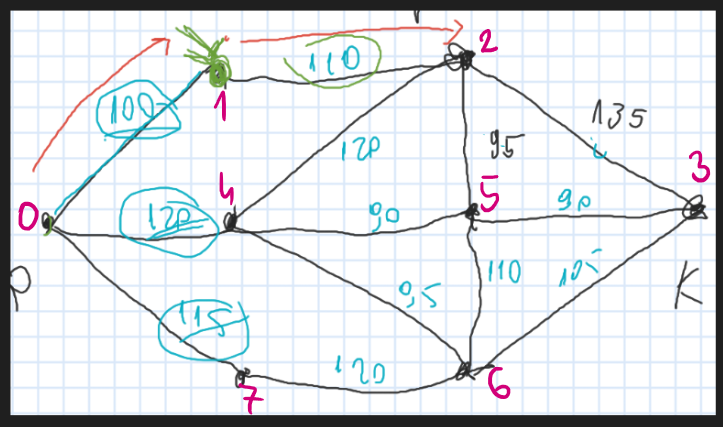

In [2]:
E = [(0, 1, 100), (1, 2, 110), (2, 3, 135), (2, 4, 120), (0, 4, 120), (4, 5, 90), (2, 5, 95), (5, 3, 90),
     (0, 7, 115), (7, 6, 120), (4, 6, 95), (5, 6, 110), (6, 3, 105)]
G = undirected_weighted_graph_list(E)

x = 0
y = 3
t = 15
print(can_fly(G, x, y, t))

True


### (Dodatkowo) Implementacja #2
##### (Znajdowanie trasy)

In [3]:
def restore_path(parents, x, y):
    path = [y]
    while y != x:
        y = parents[y]
        path.append(y)
    return path[::-1]


def flight_path(G: 'weighted graph represented by adjacency lists', x: 'start point', y: 'end point', t: 'delta'):
    n = len(G)
    parents = [-1] * n
    
    def dfs(u, height):
        visited[u] = True
        if u == y: return True
        for v, tunnel_height in G[u]:
            if not visited[v] and tunnel_height - t <= height <= tunnel_height + t:
                parents[v] = u
                if dfs(v, height): return True
        return False
    
    flight_h = -1
    for v, height in G[x]:
        # Loop over all possible heights
        for h in range(height - t, height + t + 1):
            visited = [False] * n
            visited[x] = True
            parents[v] = x
            if dfs(v, h): 
                flight_h = h
                break
                
#     print(parents)
                
    return flight_h, restore_path(parents, x, y) if flight_h >= 0 else None


def undirected_weighted_graph_list(E: 'array of edges'):
    # Find the number of vertices
    n = 0
    for edge in E:
        n = max(n, edge[0], edge[1])
    n += 1
    # Create a graph matrix
    G = [[] for _ in range(n)]
    for edge in E:
        G[edge[0]].append((edge[1], edge[2]))
        G[edge[1]].append((edge[0], edge[2]))
    return G

###### Kilka testów

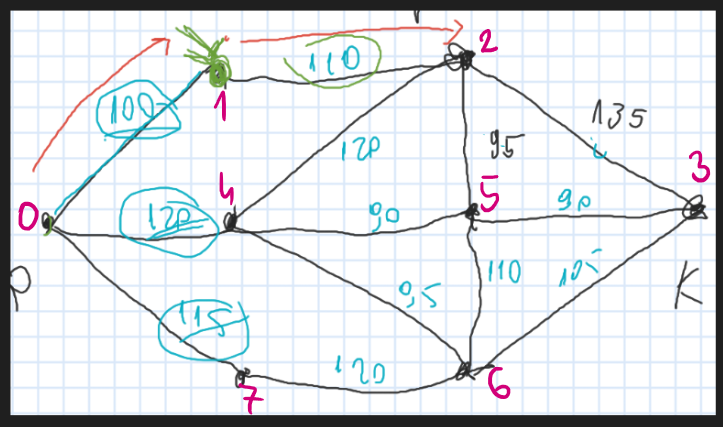

In [4]:
E = [(0, 1, 100), (1, 2, 110), (2, 3, 135), (2, 4, 120), (0, 4, 120), (4, 5, 90), (2, 5, 95), (5, 3, 90),
     (0, 7, 115), (7, 6, 120), (4, 6, 95), (5, 6, 110), (6, 3, 105)]
G = undirected_weighted_graph_list(E)

x = 0
y = 3
t = 15
print(flight_path(G, x, y, t))

(105, [0, 7, 6, 4, 2, 5, 3])


### (Dodatkowo) Implementacja #3
##### (Znajdowanie najkrótszej trasy)

In [5]:
from queue import Queue


def restore_path(parents, x, y):
    path = [y]
    while y != x:
        y = parents[y]
        path.append(y)
    return path[::-1]


def flight_shortest_path(G: 'weighted graph represented by adjacency lists', 
                         x: 'start point', y: 'end point', t: 'delta'):
    n = len(G)
    parents = [-1] * n
    dist = [-1] * n

    def bfs(u, height):
        visited = [False] * n
        visited[u] = visited[x] = True
        dist[x] = 0
        dist[u] = 1
        parents[u] = x
        q = Queue()
        q.put(u)
        while not q.empty():
            u = q.get()
            if u == y: return True
            for v, tunnel_height in G[u]:
                if not visited[v] and tunnel_height - t <= height <= tunnel_height + t:
                    visited[v] = True
                    parents[v] = u
                    dist[v] = dist[u] + 1
                    q.put(v)
        return False
            
    flight_h = -1
    min_dist = float('inf')
    for v, height in G[x]:
        # Loop over all possible heights
        for h in range(height - t, height + t + 1):
            if bfs(v, h) and dist[y] < min_dist:
                min_dist = dist[y]
                flight_h = h
                
    # If couldn't have reached the target, return None
    if flight_h < 0: return None
    
    # Run BFS again with the shortest distnace parameters to restore the path
    bfs(x, flight_h)
    
    print(parents)
                
    return flight_h, restore_path(parents, x, y) if flight_h >= 0 else None


def undirected_weighted_graph_list(E: 'array of edges'):
    # Find the number of vertices
    n = 0
    for edge in E:
        n = max(n, edge[0], edge[1])
    n += 1
    # Create a graph matrix
    G = [[] for _ in range(n)]
    for edge in E:
        G[edge[0]].append((edge[1], edge[2]))
        G[edge[1]].append((edge[0], edge[2]))
    return G

###### Kilka testów

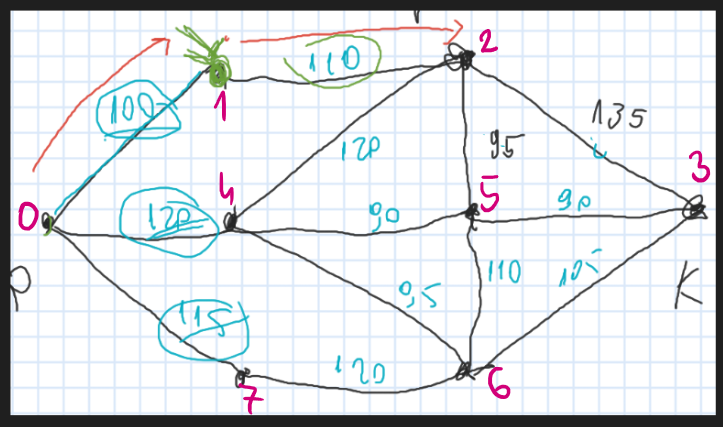

In [6]:
E = [(0, 1, 100), (1, 2, 110), (2, 3, 135), (2, 4, 120), (0, 4, 120), (4, 5, 90), (2, 5, 95), (5, 3, 90),
     (0, 7, 115), (5, 6, 110), (7, 6, 120), (4, 6, 95), (6, 3, 105)]
G = undirected_weighted_graph_list(E)

x = 0
y = 3
t = 15
print(flight_shortest_path(G, x, y, t))

[0, 0, 1, 5, 0, 4, 4, 0]
(105, [0, 4, 5, 3])


In [7]:
x = 6
y = 1
t = 10
print(flight_shortest_path(G, x, y, t))

[7, 2, 5, 6, 6, 6, 6, 6]
(100, [6, 5, 2, 1])


In [8]:
x = 6
y = 1
t = 5
print(flight_shortest_path(G, x, y, t))

[7, 2, 4, 6, 0, 6, 6, 6]
(115, [6, 7, 0, 4, 2, 1])


# 2) Sposób

Miał zostać dodany lepszy sposób, ale nie mam pomysłu.